In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

 55000 10000 5000

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


In [2]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [3]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)

In [4]:
# 1번째 컨볼루션 층
# 5X5크기를 가지는 32개의 필터를 적용

F2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, F2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [5]:
# 2번째 컨볼루션 층
F3 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[64]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, F3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
# 3번째 컨볼루션 층
F4 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.01))  
b4 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, F4, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z4 = tf.nn.relu(C4+b4)

# 3번째 max pooling을 통해 7 X 7 X 128 => 4 X 4 X 128
A4 = tf.nn.max_pool(Z4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
# 4번째 컨볼루션 층
F5 = tf.Variable(tf.random_normal([5, 5, 128, 256], stddev=0.01))  
b5 = tf.Variable(tf.constant(0.1, shape=[256]))   

# 3번째 컨볼루션 연산을 통해 4 X 4 X 128 => 4 X 4 X 256
C5 = tf.nn.conv2d(A4, F5, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z5 = tf.nn.relu(C5+b5)

# 3번째 max pooling을 통해 4 X 4 X 256 => 2 X 2 X 256
A5 = P5 = tf.nn.max_pool(Z5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [8]:
# 2X2 크기를 가진 256개의 activation map을 flatten 시킴
A5_flat = P5_flat = tf.reshape(A5, [-1, 256*2*2])

In [9]:
# 출력층
W6 = tf.Variable(tf.random_normal([256*2*2, 10], stddev=0.01))
b6 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z6, 즉 softmax 에 들어가는 입력 값
Z6 = logits = tf.matmul(A5_flat, W6) + b6    # 선형회귀 값 Z6

y = A6 = tf.nn.softmax(Z6)

In [10]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z6, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [11]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A6, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A6, 1)

In [13]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    F2_val, F3_val, F4_val, F5_val = sess.run([F2, F3, F4, F5], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    print('F2_val.shape = ', F2_val.shape, ', F3_val.shape = ', F3_val.shape, ', F4_val.shape = ', F4_val.shape, ', F5_val.shape = ', F5_val.shape)
        
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.8781435
epochs =  0 , step =  100 , loss_val =  0.66055983
epochs =  0 , step =  200 , loss_val =  0.34445998
epochs =  0 , step =  300 , loss_val =  0.10659461
epochs =  0 , step =  400 , loss_val =  0.06405121
epochs =  0 , step =  500 , loss_val =  0.10763093
epochs =  1 , step =  0 , loss_val =  0.054287314
epochs =  1 , step =  100 , loss_val =  0.020199675
epochs =  1 , step =  200 , loss_val =  0.019536728
epochs =  1 , step =  300 , loss_val =  0.04986802
epochs =  1 , step =  400 , loss_val =  0.031279057
epochs =  1 , step =  500 , loss_val =  0.09514955
epochs =  2 , step =  0 , loss_val =  0.09035097
epochs =  2 , step =  100 , loss_val =  0.07778827
epochs =  2 , step =  200 , loss_val =  0.04446849
epochs =  2 , step =  300 , loss_val =  0.010674302
epochs =  2 , step =  400 , loss_val =  0.023640022
epochs =  2 , step =  500 , loss_val =  0.06521188
epochs =  3 , step =  0 , loss_val =  0.0046421275
epochs =  3 , step =  100 , loss

epochs =  25 , step =  500 , loss_val =  0.042384017
epochs =  26 , step =  0 , loss_val =  0.0009019769
epochs =  26 , step =  100 , loss_val =  0.00016233146
epochs =  26 , step =  200 , loss_val =  2.5380443e-05
epochs =  26 , step =  300 , loss_val =  3.1302125e-06
epochs =  26 , step =  400 , loss_val =  0.0118863275
epochs =  26 , step =  500 , loss_val =  0.005951987
epochs =  27 , step =  0 , loss_val =  0.00034176096
epochs =  27 , step =  100 , loss_val =  0.0038375151
epochs =  27 , step =  200 , loss_val =  1.3391471e-05
epochs =  27 , step =  300 , loss_val =  0.0013363267
epochs =  27 , step =  400 , loss_val =  5.8788137e-06
epochs =  27 , step =  500 , loss_val =  0.00018763001
epochs =  28 , step =  0 , loss_val =  0.0038765548
epochs =  28 , step =  100 , loss_val =  0.0034289698
epochs =  28 , step =  200 , loss_val =  8.967189e-06
epochs =  28 , step =  300 , loss_val =  2.3538922e-05
epochs =  28 , step =  400 , loss_val =  8.931569e-05
epochs =  28 , step =  500 ,

In [13]:
# index_label_prediction_list
print(index_label_prediction_list)

[[235, 9, 7], [247, 4, 2], [321, 2, 7], [336, 9, 4], [359, 9, 8], [445, 6, 0], [449, 3, 5], [495, 8, 2], [582, 8, 2], [625, 6, 4], [813, 9, 8], [883, 3, 1], [900, 1, 3], [916, 4, 2], [947, 8, 9], [962, 9, 7], [999, 9, 7], [1014, 6, 5], [1226, 7, 2], [1232, 9, 4], [1282, 9, 2], [1429, 9, 4], [1530, 8, 7], [1549, 4, 2], [1559, 9, 5], [1640, 9, 7], [1709, 9, 3], [1880, 6, 4], [1901, 9, 4], [1903, 7, 2], [2018, 1, 2], [2035, 5, 3], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 4], [2298, 8, 0], [2414, 9, 4], [2582, 9, 7], [2597, 5, 3], [2654, 6, 1], [2720, 9, 4], [2927, 3, 2], [2953, 3, 5], [3073, 1, 2], [3343, 8, 2], [3422, 6, 0], [3475, 3, 7], [3503, 9, 8], [3520, 6, 2], [3558, 5, 0], [3850, 9, 4], [3859, 9, 4], [3869, 9, 4], [3881, 9, 7], [4078, 9, 8], [4201, 1, 7], [4284, 9, 5], [4369, 9, 4], [4505, 9, 7], [4620, 6, 2], [4740, 3, 5], [4761, 9, 8], [4823, 9, 4], [4860, 4, 9], [4874, 9, 6], [4956, 8, 4], [5450, 0, 5], [5654, 7, 2], [5937, 5, 3], [5955, 3, 8], [5973, 3

10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
Elapsed save time =>  0:00:24.182000
Total  66  data is saved


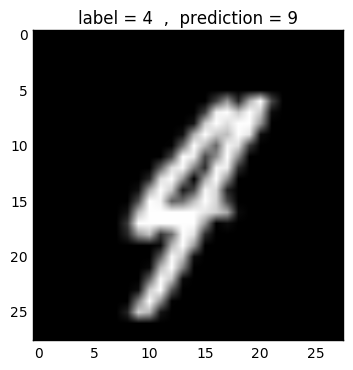

In [15]:
# check false data
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()

# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'CNN_3Conv_4X4_Adam_'
dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.mkdir(dir_name)

# change dir
os.chdir(dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)